In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to a 1D array
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy}')


Epoch 1/5
1500/1500 [==============================] - 17s 9ms/step - loss: 0.3255 - sparse_categorical_accuracy: 0.9063 - val_loss: 0.1666 - val_sparse_categorical_accuracy: 0.9518
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1629 - sparse_categorical_accuracy: 0.9520 - val_loss: 0.1182 - val_sparse_categorical_accuracy: 0.9642
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9637 - val_loss: 0.1066 - val_sparse_categorical_accuracy: 0.9673
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0985 - sparse_categorical_accuracy: 0.9700 - val_loss: 0.0950 - val_sparse_categorical_accuracy: 0.9704
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0868 - sparse_categorical_accuracy: 0.9728
Test Accuracy: 0.9728000164031982


Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0750 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0788 - val_sparse_categorical_accuracy: 0.9760
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0767 - val_sparse_categorical_accuracy: 0.9763
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0573 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0756 - val_sparse_categorical_accuracy: 0.9783
Epoch 4/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0521 - sparse_categorical_accuracy: 0.9832 - val_loss: 0.0781 - val_sparse_categorical_accuracy: 0.9772
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9764


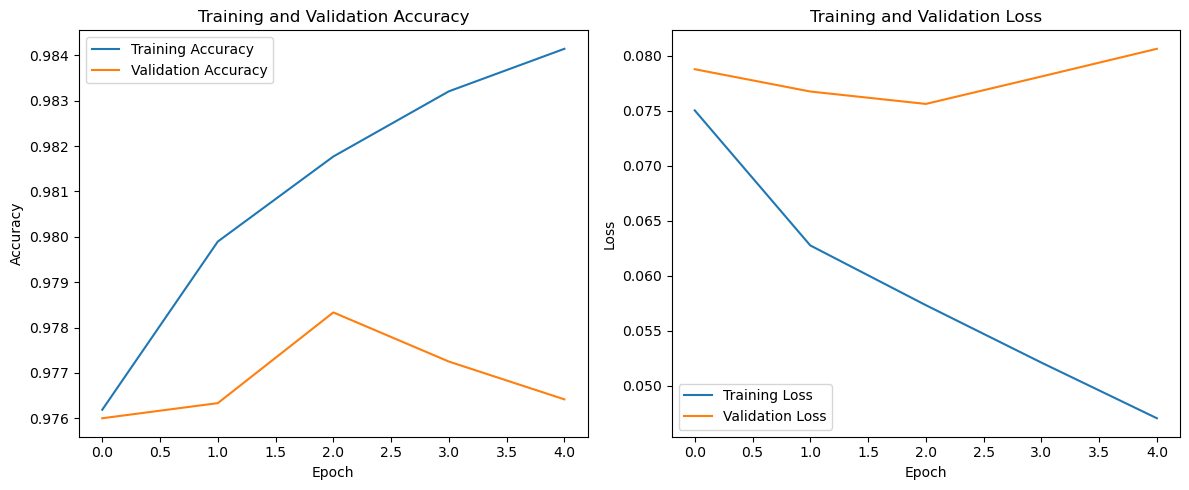

In [3]:
import matplotlib.pyplot as plt


# Train the model and keep track of training history
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
